In [50]:
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [chance_of_6]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:01<00:00, 1501.55draws/s]


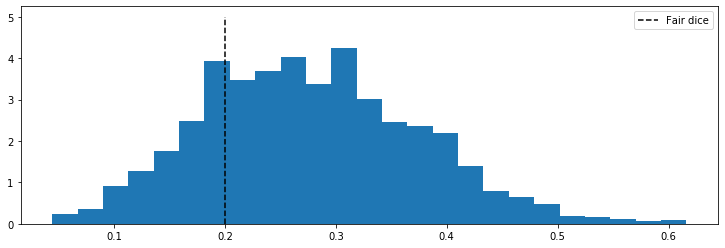

In [69]:
# Suppose I throw those numbers on the dice, is it biased towards 6?
dice_maybe_biased = [1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6,6,6]
with pm.Model():
    chance_of_6 = pm.Uniform('chance_of_6', lower=0, upper=1)
    dice_observed = pm.Bernoulli('dice_observed', chance_of_6, observed=[ 1 if x == 6 else 0 for x in observed ])
    trace = pm.sample(1000)

plt.figure(figsize=(12.5,4))
plt.hist(trace["chance_of_6"], bins=25, histtype="stepfilled", density=True)
plt.vlines(0.2, 0, 5, linestyle="--", label="Fair dice")
plt.legend()
plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [chance_of_6_fair, chance_of_6_maybe_bias]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:02<00:00, 1114.27draws/s]
The acceptance probability does not match the target. It is 0.8796350043565295, but should be close to 0.8. Try to increase the number of tuning steps.


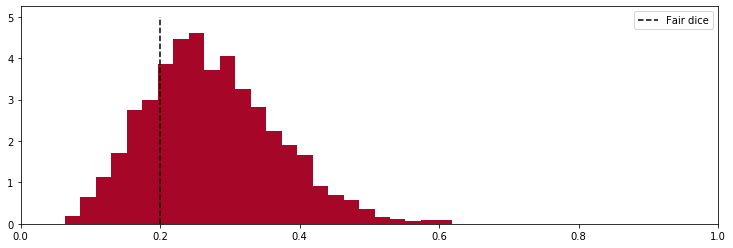

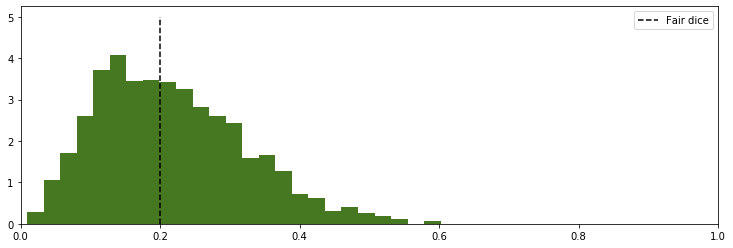

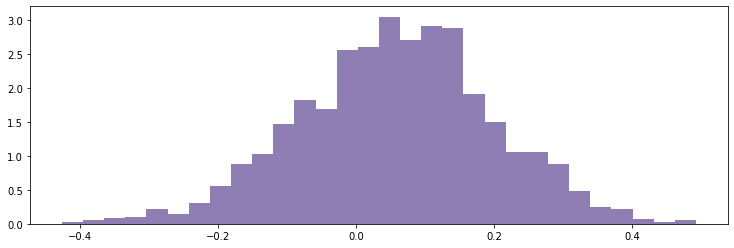

In [72]:
dice_fair = [1,2,3,4,5,6,1,2,3,4,5,6]
with pm.Model():
    chance_of_6_maybe_bias = pm.Uniform('chance_of_6_maybe_bias', lower=0, upper=1)
    chance_of_6_fair = pm.Uniform('chance_of_6_fair', lower=0, upper=1)
    
    delta = pm.Deterministic("delta", chance_of_6_maybe_bias - chance_of_6_fair)
    
    obs_A = pm.Bernoulli("obs_maybe_bias", chance_of_6_maybe_bias, observed=[ 1 if x == 6 else 0 for x in dice_maybe_biased ])
    obs_B = pm.Bernoulli("obs_fair", chance_of_6_fair, observed=[ 1 if x == 6 else 0 for x in dice_fair ])
    
    trace = pm.sample(1000)

plt.figure(figsize=(12.5,4))
plt.hist(trace["chance_of_6_maybe_bias"], bins=25, color="#A60628", histtype="stepfilled", density=True)
plt.vlines(0.2, 0, 5, linestyle="--", label="Fair dice")
plt.xlim(0, 1)
plt.legend()
plt.show()

plt.figure(figsize=(12.5,4))
plt.hist(trace["chance_of_6_fair"], bins=25, color="#467821", histtype="stepfilled", density=True)
plt.vlines(0.2, 0, 5, linestyle="--", label="Fair dice")
plt.xlim(0, 1)
plt.legend()
plt.show()

plt.figure(figsize=(12.5,4))
plt.hist(trace["delta"], histtype='stepfilled', bins=30, alpha=0.85, color="#7A68A6", density=True)
plt.show()

In [73]:
print("Probability of A being more biased than B: %.3f" % \
    np.mean(trace["delta"] > 0))

print("Probability of A being less biased then B: %.3f" % \
    np.mean(trace["delta"] < 0))

Probability of A being more biased than B: 0.671
Probability of A being less biased then B: 0.329


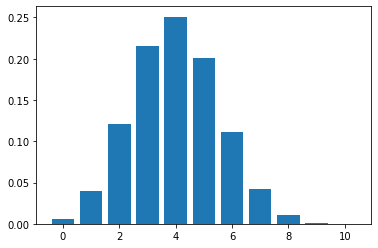

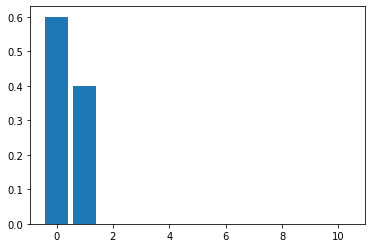

In [95]:
import scipy.stats as stats
binomial = stats.binom
bernoulli = stats.bernoulli

N = 10
p = 0.4
X = np.arange(N + 1)
plt.bar(X, binomial.pmf(X, N, p))
plt.show()

plt.bar(X, bernoulli.pmf(X, p))
plt.show()